In [2]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import numpy as np
import pickle
import scipy

from utils import utils
import utils.efinet as efinet
from keras.utils.np_utils import to_categorical

In [4]:
# Load and concat data
with open("../tests/data/NUDZ/NUDZ_Test_1.pkl", "rb") as f:
    nudz = pickle.load(f)

with open("../tests/data/GADF_prepared/GADF_5s_NUDZ_Test_1.pkl", "rb") as f:
    gadf_nudz = pickle.load(f)

gcn_nudz = scipy.io.loadmat("../tests/data/GCN_prepared/GCN_5s_NUDZ_Test_1.mat")
gcn_nudz = np.transpose(gcn_nudz["cause5s"], (0, 2, 3, 1))

result_nudz = []
for i in range(len(gadf_nudz)):
    result_nudz.append(gcn_nudz[i] + gadf_nudz[i])

data_nudz = np.array(result_nudz)

print("Data shape: ", np.shape(data_nudz))

Data shape:  (436, 32, 32, 3)


In [27]:
bio_start = 1652797770769
events_start = 1652798162654
offset = int(np.abs(bio_start - events_start) / 500 / 5)
print(offset)

156


In [129]:
%%capture
_, eval_model = efinet.build_graph([32, 32, 3], 2)
eval_model.load_weights(f"../results/models/CLAS_5s_AUG.h5")

# Predict the values from the validation dataset
pred = eval_model.predict(data_nudz[offset:])

In [130]:
plt.rcParams["figure.figsize"] = (20, 5)
probs = pd.DataFrame(pred[0])
probs["time"] = np.array([1652798162654] * len(probs)) + (np.array(range(0, len(probs))) * 500 * 5)

(1652798162654.0, 1652798862654.0)

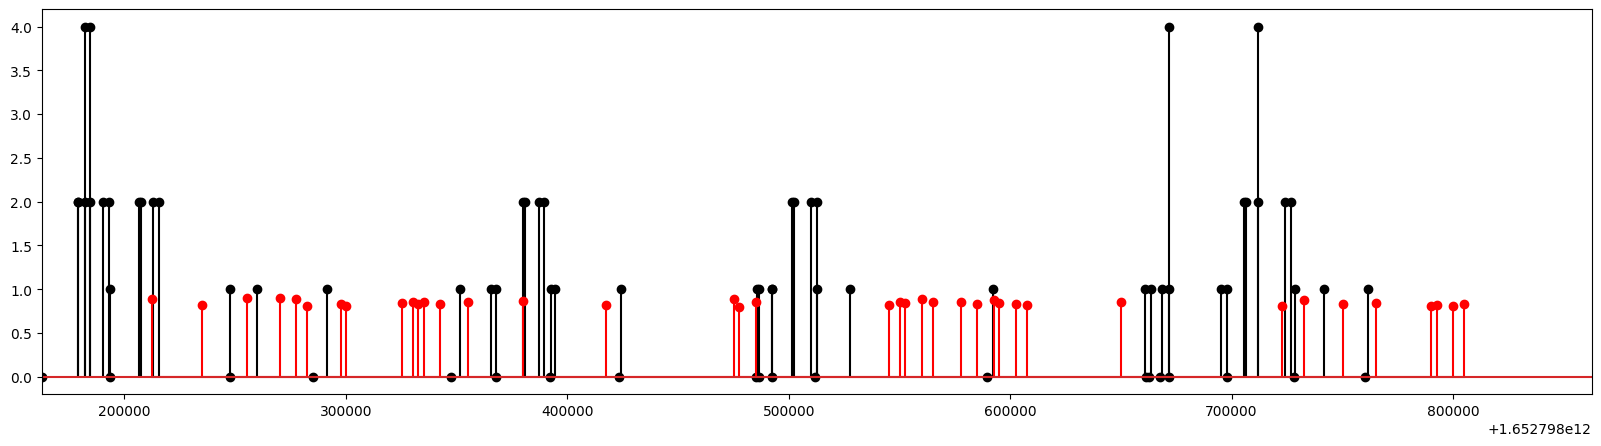

In [138]:
events = pd.read_csv("../tests/data/NUDZ/NUDZ_Test_1_events.csv", sep=";")
plt.stem(events["cas"], events["typ"]-8, 'k')
# plt.plot(probs["time"], probs[0], '.-')

filt_probs = probs[probs[1] > 0.80]
plt.stem(filt_probs["time"], filt_probs[1], 'r.-')
# plt.stem(filt_probs["time"], filt_probs[0], 'r.-')

# plt.stackplot(probs["time"], probs[1], colors=["#1f77b4", "#ff7f0e"])

plt.xlim([1652798162654, 1652798162654 + 1e6 - 300000])